# Análise de cliente em potencial.

## Etapa 2 Crisp-DM: Entendimento dos dados

### Dicionário de dados

| Variável                | Descrição                                            | Tipo         |
| ----------------------- | ---------------------------------------------------- | ------------ |
| data_ref                | Data de referência da análise                        | object       |
| id_cliente              | Identificador único do cliente                       | int64        |
| sexo                    | Sexo do cliente                                      | object       |
| posse_de_veiculo        | Indica se o cliente possui um veículo                | bool         |
| posse_de_imovel         | Indica se o cliente possui um imóvel                 | bool         |
| qtd_filhos              | Quantidade de filhos do cliente                      | int64        |
| tipo_renda              | Tipo de fonte de renda do cliente                    | object       |
| educacao                | Nível de escolaridade do cliente                     | object       |
| estado_civil            | Estado civil do cliente                              | object       |
| tipo_residencia         | Tipo de residência do cliente                        | object       |
| idade                   | Idade do cliente                                     | int64        |
| tempo_emprego           | Tempo de emprego do cliente (em anos)                | float64      |
| qt_pessoas_residencia   | Quantidade de pessoas na residência do cliente       | float64      |
| renda                   | Renda mensal do cliente                              | float64      |


### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Seguros SA.
Objetivo de analizar dados de clientes potenciais para venda de seguros, agrupar e categorizar os clientes.

Pergunta-chave: Quais combinações de características tornam um cliente mais propenso a adquirir seguros ou produtos?
Meta: Criar uma classificação categórica ('carro', 'vida', 'imóvel', etc.) que auxilie nas estratégias de venda personalizada.



#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [6]:
# !pip install ydata_profiling

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree

import numpy as np

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [9]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [10]:
renda.head(2)

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           0   Empresário         Secundário     Solteiro            Casa   
1           0  Assalariado  Superior completo       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    renda  
0     26       6.602740                    1.0  8060.34  
1     28       7.183562                    2.0  1852.15

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [12]:
prof = ProfileReport(renda, 
                        title="Relatório de Perfil com Correlações", 
                        explorative=True,
                        correlations={"pearson": {"calculate": True}, 
                                      "spearman": {"calculate": True},
                                      "kendall": {"calculate": True}})
prof.to_file('./output/renda_analisys2.html')
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
print(renda['data_ref'].unique())

['2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01' '2016-01-01' '2016-02-01' '2016-03-01']


In [14]:
duplicatas = renda['id_cliente'].duplicated().sum()
print(f"Quantidade de duplicatas: {duplicatas}")

Quantidade de duplicatas: 5155


In [15]:
contagem = renda['id_cliente'].value_counts()

# Contar quantos valores têm 2 duplicatas, 3 duplicatas, etc.
quantidade_duplicatas = contagem.value_counts()

print("Quantidade de registros com 2 duplicatas:", quantidade_duplicatas.get(2, 0))
print("Quantidade de registros com 3 duplicatas:", quantidade_duplicatas.get(3, 0))
print("Quantidade de registros com 4 duplicatas:", quantidade_duplicatas.get(4, 0))
print("Quantidade de registros com 5 duplicatas:", quantidade_duplicatas.get(5, 0))
print("Quantidade de registros com 6 duplicatas:", quantidade_duplicatas.get(6, 0))

Quantidade de registros com 2 duplicatas: 2808
Quantidade de registros com 3 duplicatas: 800
Quantidade de registros com 4 duplicatas: 199
Quantidade de registros com 5 duplicatas: 30
Quantidade de registros com 6 duplicatas: 6


### **Descrição das Variáveis e Análise Univariada**

1. **`data_ref` (Data de referência da análise - `object`):**  
   - Representa a data em que os dados foram registrados ou analisados.
   - Podemos verificar que os registros foram colhidos por apenas 15 dias, divididos em 2 anos, sendo de 01 a 12/01/2015 e de 01 a 03/01/2016.
   - A data não parece ser um dado relevante para a finalidade desta análise.

     
2. **`id_cliente` (Identificador único do cliente - `int64`):**
    - O `id_cliente` é um identificador único atribuído a cada cliente e, por isso, não é analisado estatisticamente, já que seu valor deve ser exclusivo para cada cliente.
    - Esse campo pode ser utilizado para identificar duplicatas ou inconsistências no banco de dados.
    - Ao verificarmos, encontramos 5155 duplicatas em um universo de 15000 registros, o que representa **34,37%**. Esse valor de duplicatas indica que a base de dados pode ter uma **baixa confiabilidade**, pois muitos registros estão repetidos.
    - Notamos também que existem registros com até **6 duplicatas** em apenas 2 anos. Isso sugere que o banco de dados pode estar com problemas estruturais. Portanto, seria prudente investigar a origem dessas duplicatas, revisar os processos que geram esses dados e revisar a estrutura do **backend** para evitar a inserção de dados redundantes.


3. **`sexo` (Sexo do cliente - `object`):**
    - Uma variável categórica que indica o sexo do cliente (ex.: Masculino, Feminino, Outro).
    - Deve-se avaliar a frequência e proporção de cada categoria.
    - Útil para entender a distribuição demográfica dos dados.
    - Após verificar se existe uma boa variação de dados neste campo, concluímos que ele não é mais relevante para os fins dessa análise.


4. **`posse_de_veiculo` (Indica se o cliente possui um veículo - `bool`):**  
   - Uma variável booleana que indica `True` (possui veículo) ou `False` (não possui).  
   - Avalie a proporção de clientes com e sem veículo para entender o perfil da base.  
   - Podemos verificar uma proporção de False: 60,93% e True: 39,07%, dado que talvez tenha valor nas análises futuras, mas deve ser verificado após a limpeza dos dados.


5. **`posse_de_imovel` (Indica se o cliente possui um imóvel - `bool`):**  
   - Similar à variável anterior, indica se o cliente é proprietário de um imóvel.  
   - Analisar as proporções ajuda a entender o nível de estabilidade financeira dos clientes.
   - podemos verificar uma proporcao de False: 32,38% e True: 67,62%, dado que talvez tenha valor nas análises futuras, mas deve ser verificado após a limpeza dos dados.


**Daqui em diante eu nao farei a analise dos dados pois com mais de 30% de duplicados qualquer analise e infruitifera**

6. **`qtd_filhos` (Quantidade de filhos do cliente - `int64`):**  
   - Representa o número de filhos de cada cliente.  
   - Pode ser usada para identificar a média, moda (valor mais comum) e o percentual de clientes sem filhos.  
   - Útil para segmentar perfis familiares.

7. **`tipo_renda` (Tipo de fonte de renda do cliente - `object`):**  
   - Indica como o cliente obtém sua renda (ex.: assalariado, autônomo, aposentado).  
   - Análise de frequência é fundamental para entender a composição da base.  
   - Pode indicar a diversidade de perfis de renda.

8. **`educacao` (Nível de escolaridade do cliente - `object`):**  
   - Indica o nível de escolaridade (ex.: Ensino Médio, Superior, Pós-Graduação).  
   - Avaliar a distribuição ajuda a identificar o nível educacional predominante na base.  
   - Útil para entender o perfil socioeconômico.

9. **`estado_civil` (Estado civil do cliente - `object`):**  
   - Pode incluir categorias como Solteiro, Casado, Divorciado, etc.  
   - Verifique a proporção de cada estado civil.  
   - Isso ajuda a entender o impacto do estado civil em outras variáveis, como renda ou posse de bens.

11. **`tipo_residencia` (Tipo de residência do cliente - `object`):**  
    - Representa o tipo de moradia do cliente (ex.: Própria, Alugada, Cedida).  
    - Avaliar a distribuição fornece insights sobre a estabilidade residencial da base.  
    - Pode ser cruzada com outras variáveis como `renda`.

12. **`idade` (Idade do cliente - `int64`):**  
    - Uma variável contínua que pode ser avaliada com média, mediana e histograma.  
    - Identifique outliers (ex.: idades muito baixas ou acima de 100 anos) para garantir a qualidade dos dados.  
    - Útil para segmentação por faixas etárias.

13. **`tempo_emprego` (Tempo de emprego do cliente - `float64`):**  
    - Mede quantos anos o cliente está empregado.  
    - Avalie se existem valores negativos ou fora do esperado (ex.: tempo maior que a idade).  
    - Pode ser cruzada com renda para entender a relação entre estabilidade no emprego e ganhos.

14. **`qt_pessoas_residencia` (Quantidade de pessoas na residência do cliente - `float64`):**  
    - Indica o número de pessoas vivendo no mesmo domicílio.  
    - Útil para identificar famílias grandes ou pequenas e calcular a renda per capita.  
    - Distribuições extremas (ex.: 0 ou valores muito altos) devem ser verificadas.

15. **`renda` (Renda mensal do cliente - `float64`):**  
    - Representa o valor em dinheiro que o cliente ganha mensalmente.  
    - Avalie média, mediana, valores mínimos e máximos, além de possíveis outliers (ex.: rendas muito altas ou negativas).  
    - É uma das variáveis mais importantes para análises financeiras.


### Entendimento dos dados - Bivariadas





Pela análise dos dados no gráfico de correlações, não existe nenhuma correlação clara ou relevante nos dados.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [20]:
# agrupando registros duplicados
renda[renda.duplicated(subset='id_cliente', keep=False)].sort_values(by='id_cliente')

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  \
9064         9064  2015-10-01           1    F             False   
7077         7077  2015-08-01           1    F             False   
9212         9212  2015-10-01           2    F             False   
7377         7377  2015-08-01           2    F             False   
13907       13907  2016-02-01           8    F             False   
...           ...         ...         ...  ...               ...   
6230         6230  2015-07-01       16633    F             False   
10867       10867  2015-11-01       16633    F             False   
12663       12663  2016-01-01       16633    F             False   
10477       10477  2015-11-01       16647    M              True   
12748       12748  2016-01-01       16647    M              True   

       posse_de_imovel  qtd_filhos   tipo_renda           educacao  \
9064              True           0   Empresário         Secundário   
7077              True           0   Empresário         Secundário   
9212              True           0   Empresário         Secundário   
7377              True           0   Empresário         Secundário   
13907             True           1  Assalariado         Secundário   
...                ...         ...          ...                ...   
6230              True           1   Empresário  Superior completo   
10867             True           1   Empresário  Superior completo   
12663             True           1   Empresário  Superior completo   
10477             True           0  Assalariado         Secundário   
12748             True           0  Assalariado         Secundário   

      estado_civil tipo_residencia  idade  tempo_emprego  \
9064      Solteiro            Casa     52       8.358904   
7077      Solteiro            Casa     52       8.358904   
9212      Solteiro            Casa     52       8.358904   
7377      Solteiro            Casa     52       8.358904   
13907     Solteiro            Casa     30       4.438356   
...            ...             ...    ...            ...   
6230      Solteiro            Casa     28       2.465753   
10867     Solteiro            Casa     28       2.465753   
12663     Solteiro            Casa     28       2.465753   
10477       Casado            Casa     30       9.800000   
12748       Casado            Casa     30       9.800000   

       qt_pessoas_residencia    renda  
9064                     1.0  1938.57  
7077                     1.0  1938.57  
9212                     1.0  5702.28  
7377                     1.0  5702.28  
13907                    2.0   373.93  
...                      ...      ...  
6230                     2.0  3771.21  
10867                    2.0  3771.21  
12663                    2.0  3771.21  
10477                    2.0  9068.91  
12748                    2.0  9068.91  

[8998 rows x 15 columns]

In [21]:
# Removendo data, pois aparentemente e o unico valor nao duplicado na maioria dos registros.
df = renda.drop(columns=['data_ref', 'Unnamed: 0'])
df = df.drop_duplicates()
df

id_cliente sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0           15056    F             False             True           0   
1            9968    M              True             True           0   
2            4312    F              True             True           0   
3           10639    F             False             True           1   
4            7064    M              True            False           0   
...           ...  ...               ...              ...         ...   
14992       14105    M             False            False           1   
14996        3722    F             False             True           0   
14997        6194    F              True             True           0   
14998        4922    M              True            False           0   
14999       14651    F             False             True           2   

             tipo_renda           educacao estado_civil tipo_residencia  \
0            Empresário         Secundário     Solteiro            Casa   
1           Assalariado  Superior completo       Casado            Casa   
2            Empresário  Superior completo       Casado            Casa   
3      Servidor público  Superior completo       Casado            Casa   
4           Assalariado         Secundário     Solteiro   Governamental   
...                 ...                ...          ...             ...   
14992       Assalariado  Superior completo       Casado            Casa   
14996       Pensionista  Superior completo     Solteiro            Casa   
14997       Assalariado  Superior completo       Casado            Casa   
14998        Empresário  Superior completo       Casado            Casa   
14999  Servidor público         Secundário        União            Casa   

       idade  tempo_emprego  qt_pessoas_residencia     renda  
0         26       6.602740                    1.0   8060.34  
1         28       7.183562                    2.0   1852.15  
2         35       0.838356                    2.0   2253.89  
3         30       4.846575                    3.0   6600.77  
4         33       4.293151                    1.0   6475.97  
...      ...            ...                    ...       ...  
14992     33       1.041096                    3.0   1918.14  
14996     57            NaN                    1.0  10093.45  
14997     45       7.832877                    2.0    604.82  
14998     36       4.298630                    2.0   3352.27  
14999     34       7.219178                    4.0   1160.99  

[10447 rows x 13 columns]

In [22]:
df[df.duplicated(subset='id_cliente', keep=False)].sort_values(by='id_cliente')

id_cliente sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
836             9    F             False             True           1   
13451           9    F             False             True           1   
5273           20    F              True             True           2   
10949          20    F              True             True           2   
11874          39    F             False             True           0   
...           ...  ...               ...              ...         ...   
14074       16489    M             False             True           3   
2344        16520    F             False            False           0   
8093        16520    F             False            False           0   
13149       16593    F             False             True           0   
10722       16593    F             False             True           0   

        tipo_renda           educacao estado_civil tipo_residencia  idade  \
836    Assalariado         Secundário     Solteiro            Casa     30   
13451  Assalariado  Superior completo     Solteiro            Casa     30   
5273   Assalariado         Secundário       Casado            Casa     43   
10949  Assalariado  Superior completo       Casado            Casa     43   
11874   Empresário         Secundário     Solteiro         Aluguel     42   
...            ...                ...          ...             ...    ...   
14074  Assalariado  Superior completo       Casado            Casa     34   
2344   Pensionista         Secundário        Viúvo            Casa     60   
8093   Pensionista  Superior completo        Viúvo            Casa     60   
13149  Assalariado  Superior completo       Casado            Casa     33   
10722  Assalariado         Secundário       Casado            Casa     33   

       tempo_emprego  qt_pessoas_residencia    renda  
836         4.438356                    2.0  1929.10  
13451       4.438356                    2.0  1929.10  
5273        8.693151                    4.0  3319.32  
10949       8.693151                    4.0  3319.32  
11874       8.860274                    1.0  5579.00  
...              ...                    ...      ...  
14074       4.594521                    5.0  9106.83  
2344             NaN                    1.0  1266.04  
8093             NaN                    1.0  1266.04  
13149      12.200000                    2.0  2614.05  
10722      12.200000                    2.0  2614.05  

[1204 rows x 13 columns]

In [23]:
duplicados = df[df.duplicated(subset='id_cliente', keep=False)]
duplicados.groupby('id_cliente').agg(lambda x: x.nunique())

sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  tipo_renda  \
id_cliente                                                                    
9              1                 1                1           1           1   
20             1                 1                1           1           1   
39             1                 1                1           1           1   
52             1                 1                1           1           1   
68             1                 1                1           1           1   
...          ...               ...              ...         ...         ...   
16465          1                 1                1           1           1   
16483          1                 1                1           1           1   
16489          1                 1                1           1           1   
16520          1                 1                1           1           1   
16593          1                 1                1           1           1   

            educacao  estado_civil  tipo_residencia  idade  tempo_emprego  \
id_cliente                                                                  
9                  2             1                1      1              1   
20                 2             1                1      1              1   
39                 2             1                1      1              1   
52                 2             1                1      1              1   
68                 2             1                1      1              1   
...              ...           ...              ...    ...            ...   
16465              2             1                1      1              0   
16483              2             1                1      1              1   
16489              2             1                1      1              1   
16520              2             1                1      1              0   
16593              2             1                1      1              1   

            qt_pessoas_residencia  renda  
id_cliente                                
9                               1      1  
20                              1      1  
39                              1      1  
52                              1      1  
68                              1      1  
...                           ...    ...  
16465                           1      1  
16483                           1      1  
16489                           1      1  
16520                           1      1  
16593                           1      1  

[602 rows x 12 columns]

In [24]:
duplicados = df[df.duplicated(subset='id_cliente', keep=False)]

# Agrupar pelos IDs duplicados e verificar divergências em cada coluna
divergencias = (
    duplicados
    .groupby('id_cliente')
    .agg(lambda x: x.nunique())  # Contar valores únicos
    .apply(lambda x: (x > 1).sum(), axis=0)  # Contar colunas com mais de um valor único por grupo
)

# Exibir divergências por coluna
print(divergencias)

sexo                       0
posse_de_veiculo           0
posse_de_imovel            0
qtd_filhos                 0
tipo_renda                 0
educacao                 602
estado_civil               0
tipo_residencia            0
idade                      0
tempo_emprego              0
qt_pessoas_residencia      0
renda                      0
dtype: int64


Após limpar todos os duplicados que só tinham diferença nos campos 'data_ref' e 'Unnamed: 0', descobrimos que temos 1004 registros duplicados. Porém, todos são atualizações de educação, então podemos ficar apenas com o último registro.

In [26]:
duplicados['educacao'].value_counts()

educacao
Secundário           602
Superior completo    602
Name: count, dtype: int64

In [27]:
ids_duplicados = df[df.duplicated(subset='id_cliente', keep=False)]['id_cliente']

# Filtrar os registros duplicados com 'educacao' igual a "Secundário"
registros_a_remover = df[(df['id_cliente'].isin(ids_duplicados)) & (df['educacao'] == 'Secundário')]

# Remover esses registros do DataFrame
df = df.drop(index=registros_a_remover.index)
df

id_cliente sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0           15056    F             False             True           0   
1            9968    M              True             True           0   
2            4312    F              True             True           0   
3           10639    F             False             True           1   
4            7064    M              True            False           0   
...           ...  ...               ...              ...         ...   
14992       14105    M             False            False           1   
14996        3722    F             False             True           0   
14997        6194    F              True             True           0   
14998        4922    M              True            False           0   
14999       14651    F             False             True           2   

             tipo_renda           educacao estado_civil tipo_residencia  \
0            Empresário         Secundário     Solteiro            Casa   
1           Assalariado  Superior completo       Casado            Casa   
2            Empresário  Superior completo       Casado            Casa   
3      Servidor público  Superior completo       Casado            Casa   
4           Assalariado         Secundário     Solteiro   Governamental   
...                 ...                ...          ...             ...   
14992       Assalariado  Superior completo       Casado            Casa   
14996       Pensionista  Superior completo     Solteiro            Casa   
14997       Assalariado  Superior completo       Casado            Casa   
14998        Empresário  Superior completo       Casado            Casa   
14999  Servidor público         Secundário        União            Casa   

       idade  tempo_emprego  qt_pessoas_residencia     renda  
0         26       6.602740                    1.0   8060.34  
1         28       7.183562                    2.0   1852.15  
2         35       0.838356                    2.0   2253.89  
3         30       4.846575                    3.0   6600.77  
4         33       4.293151                    1.0   6475.97  
...      ...            ...                    ...       ...  
14992     33       1.041096                    3.0   1918.14  
14996     57            NaN                    1.0  10093.45  
14997     45       7.832877                    2.0    604.82  
14998     36       4.298630                    2.0   3352.27  
14999     34       7.219178                    4.0   1160.99  

[9845 rows x 13 columns]

In [28]:
df[df.duplicated(subset='id_cliente', keep=False)].sort_values(by='id_cliente')

Empty DataFrame
Columns: [id_cliente, sexo, posse_de_veiculo, posse_de_imovel, qtd_filhos, tipo_renda, educacao, estado_civil, tipo_residencia, idade, tempo_emprego, qt_pessoas_residencia, renda]
Index: []

In [29]:
# Verificando valores nulos
print("Valores nulos em cada coluna:")
print(df.isnull().sum())
print('------------------------//----------------------')

Valores nulos em cada coluna:
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            1684
qt_pessoas_residencia       0
renda                       0
dtype: int64
------------------------//----------------------


In [30]:
df[df['tempo_emprego'].isnull()].head(1)

id_cliente sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
11        6881    F             False             True           0   

     tipo_renda    educacao estado_civil tipo_residencia  idade  \
11  Pensionista  Secundário       Casado            Casa     65   

    tempo_emprego  qt_pessoas_residencia    renda  
11            NaN                    2.0  1685.51

In [31]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(0)
print(df.isnull().sum())

id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [32]:
# Verificando valores únicos na coluna 'sexo'
print("Valores únicos na coluna 'sexo':")
print(df['sexo'].unique())
print('------------------------//----------------------')

# Verificando valores únicos na coluna 'educacao'
print("Valores únicos na coluna 'educacao':")
print(df['educacao'].unique())
print('------------------------//----------------------')

# Verificando valores únicos nas colunas de interesse
print("Valores únicos na coluna 'posse_de_veiculo':")
print(df['posse_de_veiculo'].unique())
print('------------------------//----------------------')

print("Valores únicos na coluna 'posse_de_imovel':")
print(df['posse_de_imovel'].unique())
print('------------------------//----------------------')

print("Valores únicos na coluna 'qtd_filhos':")
print(df['qtd_filhos'].unique())
print('------------------------//----------------------')

print("Valores únicos na coluna 'tipo_renda':")
print(df['tipo_renda'].unique())
print('------------------------//----------------------')

print("Valores únicos na coluna 'estado_civil':")
print(df['estado_civil'].unique())
print('------------------------//----------------------')

print("Valores únicos na coluna 'tipo_residencia':")
print(df['tipo_residencia'].unique())
print('------------------------//----------------------')

print("Valores únicos na coluna 'idade':")
print(df['idade'].unique())
print('------------------------//----------------------')

print("Valores únicos na coluna 'tempo_emprego':")
print(df['tempo_emprego'].unique())
print('------------------------//----------------------')

print("Valores únicos na coluna 'qt_pessoas_residencia':")
print(df['qt_pessoas_residencia'].unique())
print('------------------------//----------------------')

print("Valores únicos na coluna 'renda':")
print(df['renda'].unique())

Valores únicos na coluna 'sexo':
['F' 'M']
------------------------//----------------------
Valores únicos na coluna 'educacao':
['Secundário' 'Superior completo' 'Superior incompleto' 'Primário'
 'Pós graduação']
------------------------//----------------------
Valores únicos na coluna 'posse_de_veiculo':
[False  True]
------------------------//----------------------
Valores únicos na coluna 'posse_de_imovel':
[ True False]
------------------------//----------------------
Valores únicos na coluna 'qtd_filhos':
[ 0  1  2  3  4  7 14  5]
------------------------//----------------------
Valores únicos na coluna 'tipo_renda':
['Empresário' 'Assalariado' 'Servidor público' 'Pensionista' 'Bolsista']
------------------------//----------------------
Valores únicos na coluna 'estado_civil':
['Solteiro' 'Casado' 'Viúvo' 'União' 'Separado']
------------------------//----------------------
Valores únicos na coluna 'tipo_residencia':
['Casa' 'Governamental' 'Com os pais' 'Aluguel' 'Estúdio' 'Comun

#### Normalizacão dos dados

In [34]:
df.sort_values(by='renda', ascending=False, inplace=True)
df['sexo'] = df['sexo'].map({'M': True, 'F': False})
df.rename(columns={'sexo': 'masculino'}, inplace=True)
df.head(5)

id_cliente  masculino  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
11535        3122       True              True            False           0   
8181         6611       True              True            False           0   
5168         9588       True              True             True           0   
4458         9658       True             False             True           0   
474          6412       True             False            False           0   

        tipo_renda    educacao estado_civil tipo_residencia  idade  \
11535  Assalariado  Secundário       Casado   Governamental     58   
8181   Assalariado  Secundário       Casado            Casa     64   
5168   Assalariado  Secundário       Casado            Casa     39   
4458   Assalariado  Secundário       Casado            Casa     60   
474    Assalariado  Secundário       Casado            Casa     62   

       tempo_emprego  qt_pessoas_residencia      renda  
11535      33.569863                    2.0  245141.67  
8181       40.786301                    2.0  179538.80  
5168       20.189041                    2.0  172748.39  
4458       30.364384                    2.0  166223.85  
474        26.931507                    2.0  154006.23

In [35]:
df = pd.get_dummies(df, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])
df.head(3)

id_cliente  masculino  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
11535        3122       True              True            False           0   
8181         6611       True              True            False           0   
5168         9588       True              True             True           0   

       idade  tempo_emprego  qt_pessoas_residencia      renda  \
11535     58      33.569863                    2.0  245141.67   
8181      64      40.786301                    2.0  179538.80   
5168      39      20.189041                    2.0  172748.39   

       tipo_renda_Assalariado  ...  estado_civil_Separado  \
11535                    True  ...                  False   
8181                     True  ...                  False   
5168                     True  ...                  False   

       estado_civil_Solteiro  estado_civil_União  estado_civil_Viúvo  \
11535                  False               False               False   
8181                   False               False               False   
5168                   False               False               False   

       tipo_residencia_Aluguel  tipo_residencia_Casa  \
11535                    False                 False   
8181                     False                  True   
5168                     False                  True   

       tipo_residencia_Com os pais  tipo_residencia_Comunitário  \
11535                        False                        False   
8181                         False                        False   
5168                         False                        False   

       tipo_residencia_Estúdio  tipo_residencia_Governamental  
11535                    False                           True  
8181                     False                          False  
5168                     False                          False  

[3 rows x 30 columns]

In [36]:
print(df.isnull().sum())

id_cliente                       0
masculino                        0
posse_de_veiculo                 0
posse_de_imovel                  0
qtd_filhos                       0
idade                            0
tempo_emprego                    0
qt_pessoas_residencia            0
renda                            0
tipo_renda_Assalariado           0
tipo_renda_Bolsista              0
tipo_renda_Empresário            0
tipo_renda_Pensionista           0
tipo_renda_Servidor público      0
educacao_Primário                0
educacao_Pós graduação           0
educacao_Secundário              0
educacao_Superior completo       0
educacao_Superior incompleto     0
estado_civil_Casado              0
estado_civil_Separado            0
estado_civil_Solteiro            0
estado_civil_União               0
estado_civil_Viúvo               0
tipo_residencia_Aluguel          0
tipo_residencia_Casa             0
tipo_residencia_Com os pais      0
tipo_residencia_Comunitário      0
tipo_residencia_Estú

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [41]:
def definir_potencial(row):
    carro = (row['posse_de_veiculo'] == True) and (row['renda'] > 10000)
    vida = ((row['qtd_filhos'] > 0) or (row['estado_civil_União'] == True) or (row['estado_civil_Casado'] == True)) and (row['renda'] > 10000)
    imovel = (row['posse_de_imovel'] == True) and (row['renda'] > 10000)
    
    # Verificando as combinações
    if carro and vida and imovel:
        return 'carro, vida e imovel'
    elif carro and vida:
        return 'carro e vida'
    elif carro and imovel:
        return 'carro e imovel'
    elif vida and imovel:
        return 'vida e imovel'
    elif carro:
        return 'carro'
    elif vida:
        return 'vida'
    elif imovel:
        return 'imovel'
    else:
        return 'sem potencial'

# Aplicando a função para criar a coluna 'potencial'
df['potencial'] = df.apply(definir_potencial, axis=1)

# Exibindo o resultado
df['potencial'].value_counts()

potencial
sem potencial           8628
carro, vida e imovel     401
vida e imovel            327
carro e vida             196
vida                     153
imovel                    84
carro e imovel            40
carro                     16
Name: count, dtype: int64

In [42]:
# Variáveis explicativas
X = df.drop(columns=['potencial'])

# Variável de resposta
y = df['potencial']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Criar o classificador de árvore de decisão
modelo = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
modelo.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [43]:
# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia:.2f}")

# Relatório de classificação
print(classification_report(y_test, y_pred))


Acurácia: 1.00
                      precision    recall  f1-score   support

               carro       1.00      1.00      1.00         2
      carro e imovel       1.00      1.00      1.00         7
        carro e vida       1.00      1.00      1.00        55
carro, vida e imovel       1.00      1.00      1.00       134
              imovel       1.00      1.00      1.00        31
       sem potencial       1.00      1.00      1.00      2572
                vida       1.00      1.00      1.00        56
       vida e imovel       1.00      1.00      1.00        97

            accuracy                           1.00      2954
           macro avg       1.00      1.00      1.00      2954
        weighted avg       1.00      1.00      1.00      2954



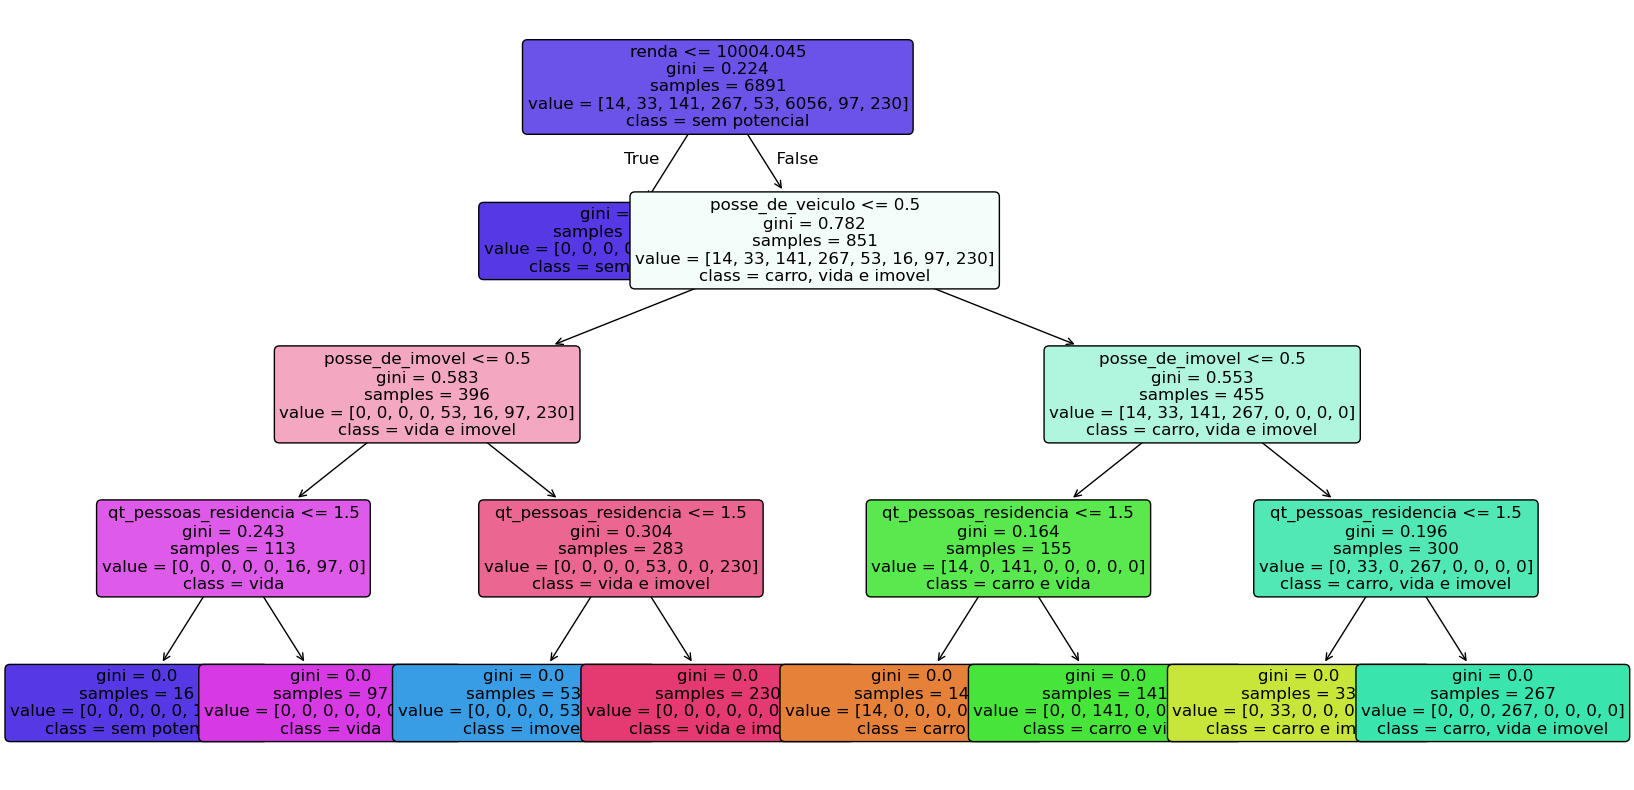

In [44]:
# Plotando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=modelo.classes_, rounded=True, fontsize=12)
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados


Nesta fase, avaliamos se as classificações criadas são úteis para o objetivo do negócio.

Métricas possíveis:
Frequência de cada categoria (já foi calculada com value_counts() do passo 41).


sem potencial  ->         8628

carro, vida e imovel  ->   401

vida e imovel     ->       327

carro e vida      ->       196

vida            ->         153

imovel          ->          84

carro e imovel    ->        40

carro             ->        16



Validação qualitativa: As categorias fazem sentido com os objetivos de negócio?

Dado o baixo desempenho nas categorias, poderíamos considerar ajustar as faixas de renda. No entanto, essa decisão depende fortemente dos custos dos serviços. Como este é um exercício fictício, não temos informações suficientes para avaliar essa possibilidade de forma mais precisa.

Se dados históricos de vendas estivessem disponíveis, seria possível calcular métricas como a precisão das classificações (ex.: clientes classificados como "vida" realmente compraram seguros de vida?).

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Objetivo: Colocar os resultados em uso no contexto do negócio.

Possíveis ações:
Análise de dados: Usar a coluna 'potencial' para identificar grupos de clientes com maior probabilidade de conversão.
Criação de estratégias:
Oferecer promoções específicas para grupos como 'carro, vida e imovel'.
Focar em campanhas para clientes classificados como 'carro' ou 'vida'.

Automatização: Salvar o script para que ele possa ser aplicado regularmente em novos dados de clientes.

## Etapa EXTRA: Impacto de outras variáveis no resultado para apuração de possíveis tendências.

In [52]:
# Criando uma tabela cruzada para cada dummy de educação
educacao_potencial = df.groupby('potencial')[
    ['educacao_Primário', 
     'educacao_Pós graduação',
     'educacao_Secundário',
     'educacao_Superior completo',
     'educacao_Superior incompleto']
].sum()

# Convertendo para proporções (opcional)
educacao_potencial_pct = educacao_potencial.div(educacao_potencial.sum(axis=1), axis=0) * 100

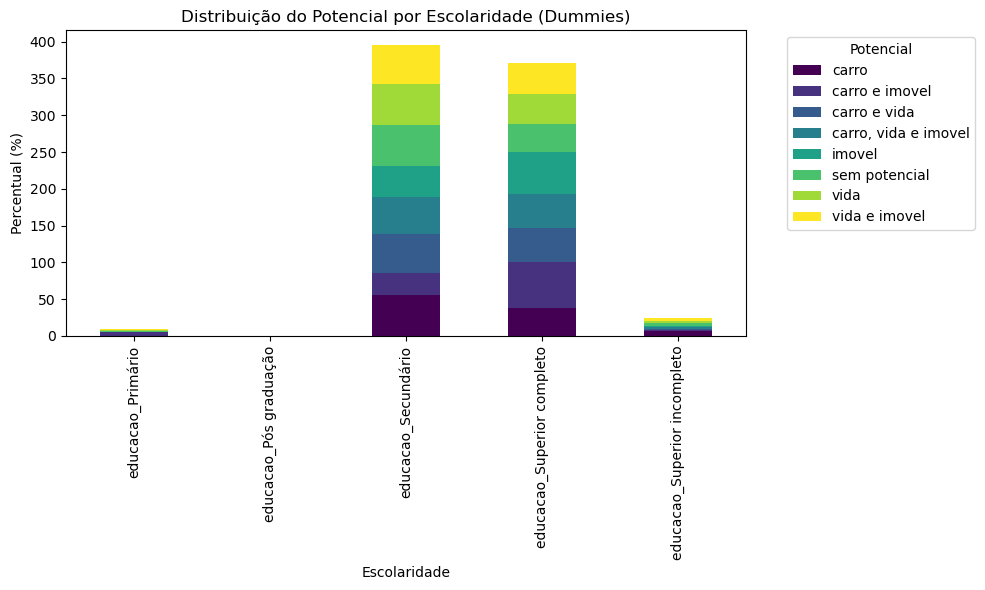

In [53]:
# Criando o gráfico de barras empilhado
educacao_potencial_pct.T.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    colormap='viridis'
)

plt.title('Distribuição do Potencial por Escolaridade (Dummies)')
plt.ylabel('Percentual (%)')
plt.xlabel('Escolaridade')
plt.legend(title='Potencial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [54]:
from sklearn.linear_model import LogisticRegression

# Separando as variáveis explicativas (dummies de escolaridade)
X = df[['educacao_Primário', 'educacao_Pós graduação', 'educacao_Secundário',
        'educacao_Superior completo', 'educacao_Superior incompleto']]

# Variável resposta (convertendo 'potencial' em numérico, caso necessário)
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df['potencial'])

# Ajustando o modelo
modelo = LogisticRegression()
modelo.fit(X, y)

# Coeficientes do modelo
coeficientes = pd.Series(modelo.coef_[0], index=X.columns)
print("Coeficientes do modelo:")
print(coeficientes)


Coeficientes do modelo:
educacao_Primário              -0.186068
educacao_Pós graduação         -0.034666
educacao_Secundário            -0.204219
educacao_Superior completo     -0.432862
educacao_Superior incompleto    0.163842
dtype: float64


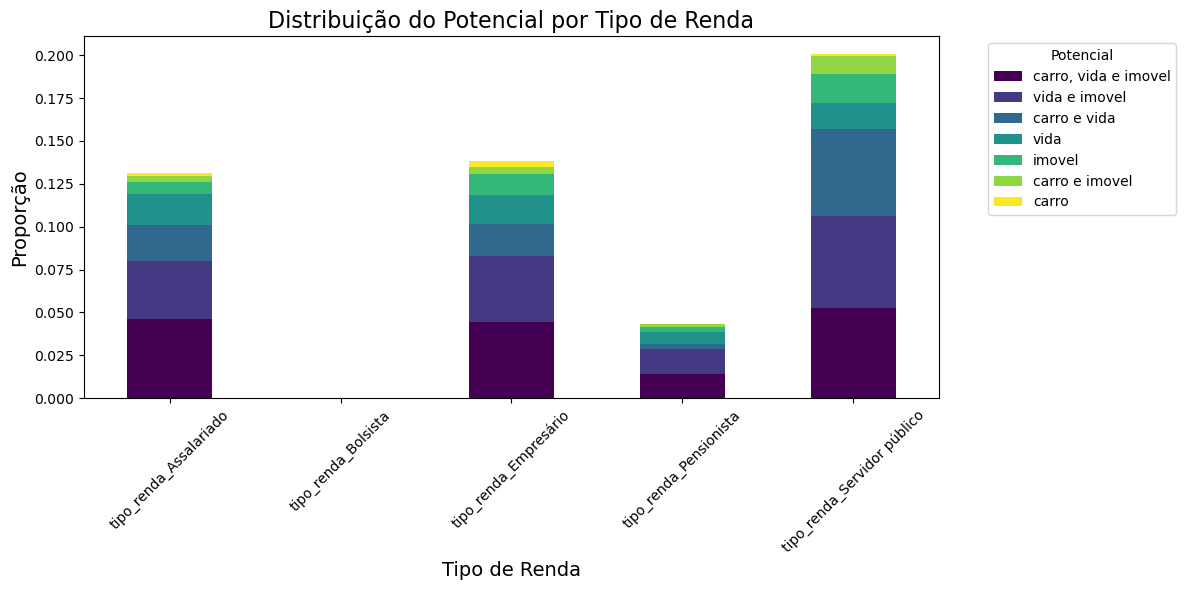

In [55]:
# Listando as colunas de dummies relacionadas ao tipo de renda
colunas_tipo_renda = [
    'tipo_renda_Assalariado',
    'tipo_renda_Bolsista',
    'tipo_renda_Empresário',
    'tipo_renda_Pensionista',
    'tipo_renda_Servidor público'
]

# Criando um DataFrame para armazenar as proporções
df_renda_potencial = pd.DataFrame()

# Calculando as proporções de cada potencial por tipo de renda, excluindo 'sem potencial'
for coluna in colunas_tipo_renda:
    # Filtra os clientes que pertencem à categoria atual
    filtro = df[coluna] == 1
    proporcoes = df.loc[filtro, 'potencial'].value_counts(normalize=True)
    
    # Excluindo a categoria 'sem potencial'
    proporcoes = proporcoes[proporcoes.index != 'sem potencial']
    
    # Armazena no DataFrame de resultados
    df_renda_potencial[coluna] = proporcoes

# Transpondo para facilitar a visualização
df_renda_potencial = df_renda_potencial.T

# Preenchendo valores NaN com 0
df_renda_potencial = df_renda_potencial.fillna(0)

# Plotando o gráfico de barras
df_renda_potencial.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Adicionando título e legendas
plt.title('Distribuição do Potencial por Tipo de Renda', fontsize=16)
plt.xlabel('Tipo de Renda', fontsize=14)
plt.ylabel('Proporção', fontsize=14)
plt.legend(title='Potencial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajuste do layout para evitar corte

# Exibindo o gráfico
plt.show()

As duas análises extras sanam curiosidades, porém não existe nenhuma utilidade prática imediata. Elas só seriam úteis se nós já tivéssemos histórico de compras.